In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from scipy.stats import kruskal
from sklearn.metrics import mean_squared_error, r2_score

In [23]:
df = pd.read_csv(r"C:\Users\ual-laptop\Documents\Data Science\archive (2)\mental_health_and_technology_usage_2024.csv")

print(df.head())

      User_ID  Age  Gender  Technology_Usage_Hours  Social_Media_Usage_Hours  \
0  USER-00001   23  Female                    6.57                      6.00   
1  USER-00002   21    Male                    3.01                      2.57   
2  USER-00003   51    Male                    3.04                      6.14   
3  USER-00004   25  Female                    3.84                      4.48   
4  USER-00005   53    Male                    1.20                      0.56   

   Gaming_Hours  Screen_Time_Hours Mental_Health_Status Stress_Level  \
0          0.68              12.36                 Good          Low   
1          3.74               7.61                 Poor         High   
2          1.26               3.16                 Fair         High   
3          2.59              13.08            Excellent       Medium   
4          0.29              12.63                 Good          Low   

   Sleep_Hours  Physical_Activity_Hours Support_Systems_Access  \
0         8.01      

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   User_ID                   10000 non-null  object 
 1   Age                       10000 non-null  int64  
 2   Gender                    10000 non-null  object 
 3   Technology_Usage_Hours    10000 non-null  float64
 4   Social_Media_Usage_Hours  10000 non-null  float64
 5   Gaming_Hours              10000 non-null  float64
 6   Screen_Time_Hours         10000 non-null  float64
 7   Mental_Health_Status      10000 non-null  object 
 8   Stress_Level              10000 non-null  object 
 9   Sleep_Hours               10000 non-null  float64
 10  Physical_Activity_Hours   10000 non-null  float64
 11  Support_Systems_Access    10000 non-null  object 
 12  Work_Environment_Impact   10000 non-null  object 
 13  Online_Support_Usage      10000 non-null  object 
dtypes: floa

In [25]:
print(df.describe())

                Age  Technology_Usage_Hours  Social_Media_Usage_Hours  \
count  10000.000000            10000.000000              10000.000000   
mean      41.518600                6.474341                  3.972321   
std       13.920217                3.169022                  2.313707   
min       18.000000                1.000000                  0.000000   
25%       29.000000                3.760000                  1.980000   
50%       42.000000                6.425000                  3.950000   
75%       54.000000                9.212500                  5.990000   
max       65.000000               12.000000                  8.000000   

       Gaming_Hours  Screen_Time_Hours   Sleep_Hours  Physical_Activity_Hours  
count  10000.000000       10000.000000  10000.000000             10000.000000  
mean       2.515598           7.975765      6.500724                 5.003860  
std        1.446748           4.042608      1.450933                 2.905044  
min        0.000000   

In [26]:
print(df.isnull().sum())

User_ID                     0
Age                         0
Gender                      0
Technology_Usage_Hours      0
Social_Media_Usage_Hours    0
Gaming_Hours                0
Screen_Time_Hours           0
Mental_Health_Status        0
Stress_Level                0
Sleep_Hours                 0
Physical_Activity_Hours     0
Support_Systems_Access      0
Work_Environment_Impact     0
Online_Support_Usage        0
dtype: int64


Unique Values in Categorical Columns

In [27]:
for col in ["Gender", "Stress_Level", "Mental_Health_Status", 
            "Support_Systems_Access", "Work_Environment_Impact", "Online_Support_Usage"]:
    print(f"{col} →", df[col].unique())

Gender → ['Female' 'Male' 'Other']
Stress_Level → ['Low' 'High' 'Medium']
Mental_Health_Status → ['Good' 'Poor' 'Fair' 'Excellent']
Support_Systems_Access → ['No' 'Yes']
Work_Environment_Impact → ['Negative' 'Positive' 'Neutral']
Online_Support_Usage → ['Yes' 'No']


Encode Mental Health Score

In [44]:
mh_map = {"Poor":1, "Fair":2, "Good":3, "Excellent":4}
df["MH_Score"] = df["Mental_Health_Status"].map(mh_map)
df["MH_Score"].head()

0    3
1    1
2    2
3    4
4    3
Name: MH_Score, dtype: int64

Group Means Summary

In [46]:
group_means = df.groupby("Mental_Health_Status")[
    ["Screen_Time_Hours", "Sleep_Hours", "Physical_Activity_Hours",
     "Gaming_Hours", "Social_Media_Usage_Hours"]
].mean().round(2)

group_means


,Screen_Time_Hours,Sleep_Hours,Physical_Activity_Hours,Gaming_Hours,Social_Media_Usage_Hours
Mental_Health_Status,,,,,
Excellent,7.95,6.48,5.05,2.54,3.93
Fair,7.92,6.51,4.98,2.49,4.02
Good,8.09,6.50,4.96,2.50,3.99
Poor,7.94,6.52,5.02,2.52,3.95


Outliers in Screen Time and Sleep Hours

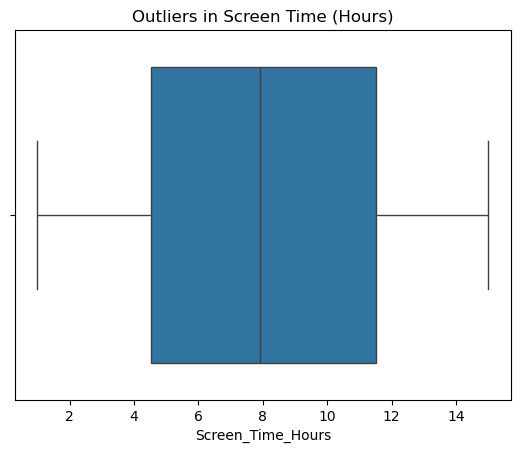

In [30]:
sns.boxplot(x=df["Screen_Time_Hours"])
plt.title("Outliers in Screen Time (Hours)")
plt.show()

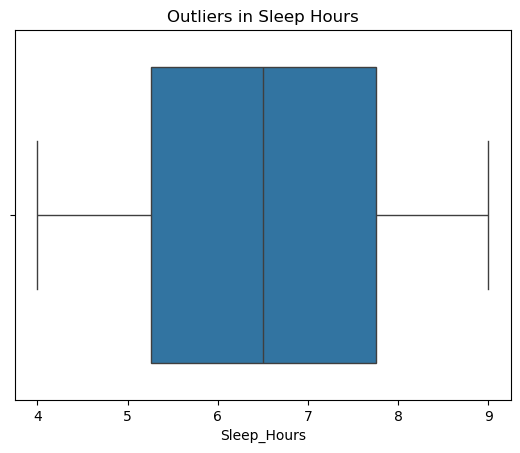

In [31]:
sns.boxplot(x=df["Sleep_Hours"])
plt.title("Outliers in Sleep Hours")
plt.show()

Relationship Between Stress & Screen Time

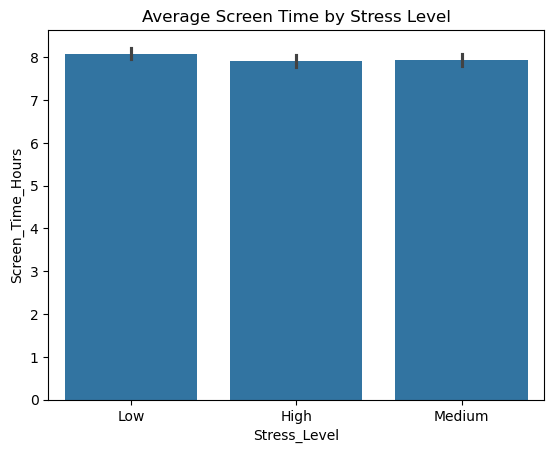

In [32]:
sns.barplot(x="Stress_Level", y="Screen_Time_Hours", data=df, estimator="mean")
plt.title("Average Screen Time by Stress Level")
plt.show()

Combined Effect: Physical Activity vs Stress

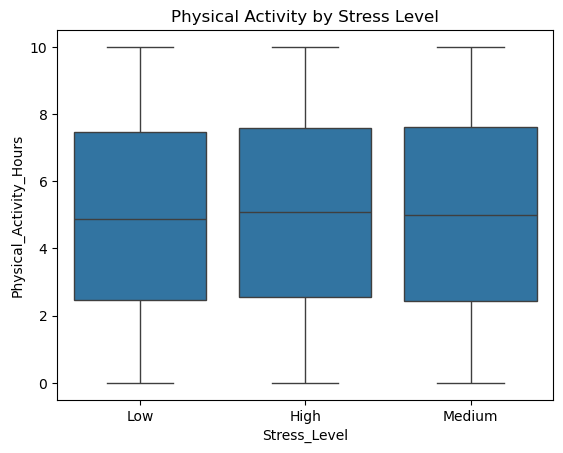

In [33]:
sns.boxplot(x="Stress_Level", y="Physical_Activity_Hours", data=df)
plt.title("Physical Activity by Stress Level")
plt.show()

Correlation Between Numeric Variables

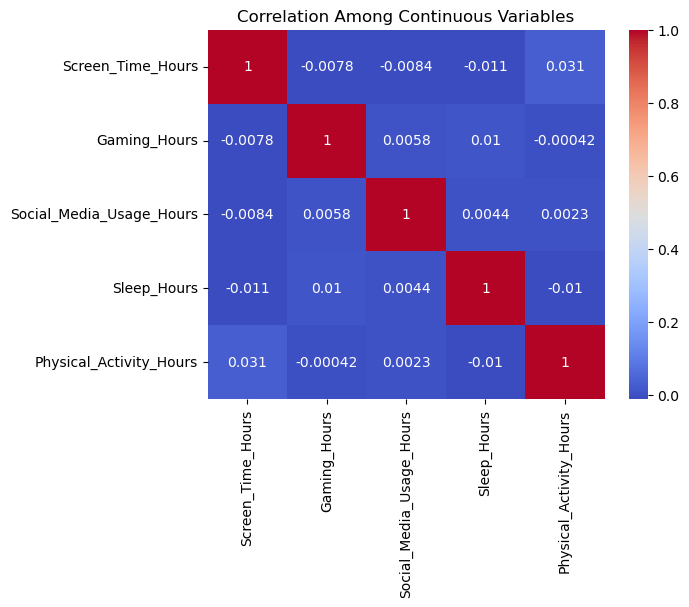

In [34]:
corr = df[["Screen_Time_Hours", "Gaming_Hours", "Social_Media_Usage_Hours",
           "Sleep_Hours", "Physical_Activity_Hours"]].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Among Continuous Variables")
plt.show()

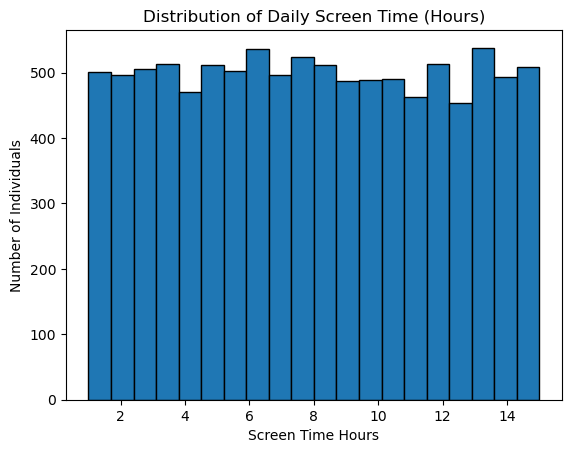

In [35]:
# Histogram for Screen Time Hours
plt.hist(df["Screen_Time_Hours"], bins=20, edgecolor='black')
plt.title("Distribution of Daily Screen Time (Hours)")
plt.xlabel("Screen Time Hours")
plt.ylabel("Number of Individuals")
plt.show()

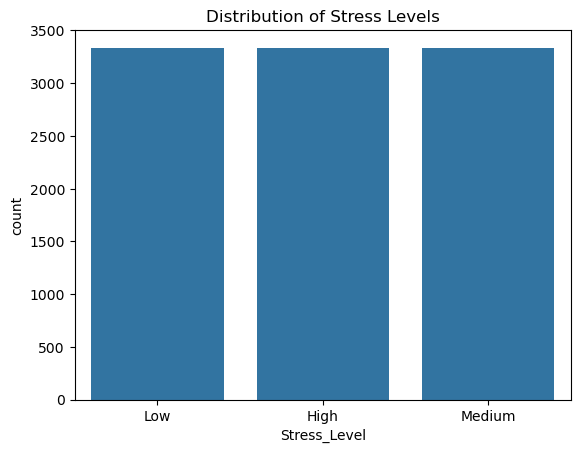

In [36]:
# Bar chart for Stress Level
sns.countplot(x="Stress_Level", data=df)
plt.title("Distribution of Stress Levels")
plt.show()

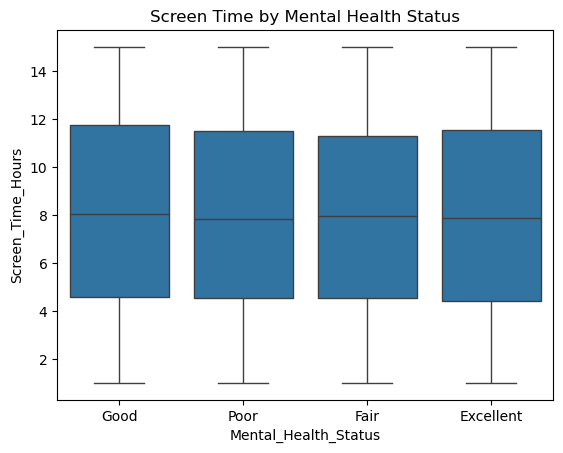

In [37]:
# Boxplot: Screen Time vs Mental Health Status
sns.boxplot(x="Mental_Health_Status", y="Screen_Time_Hours", data=df)
plt.title("Screen Time by Mental Health Status")
plt.show()

In [39]:
# Correlation
print(df[["Screen_Time_Hours", "MH_Score"]].corr())

                   Screen_Time_Hours  MH_Score
Screen_Time_Hours           1.000000  0.004934
MH_Score                    0.004934  1.000000


Kruskal-Wallis Test

In [47]:
poor  = df[df["Mental_Health_Status"] == "Poor"]["Screen_Time_Hours"]
fair  = df[df["Mental_Health_Status"] == "Fair"]["Screen_Time_Hours"]
good  = df[df["Mental_Health_Status"] == "Good"]["Screen_Time_Hours"]
excel = df[df["Mental_Health_Status"] == "Excellent"]["Screen_Time_Hours"]

stat, p = kruskal(poor, fair, good, excel)

print("Kruskal–Wallis Test Results")
print("Statistic:", stat)
print("p-value :", p)


Kruskal–Wallis Test Results
Statistic: 2.613880482616653
p-value : 0.4550613138368891


In [40]:
# Linear Regression
X = df[["Screen_Time_Hours"]]
y = df["MH_Score"]

model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [48]:
features = [
    "Screen_Time_Hours",
    "Sleep_Hours",
    "Physical_Activity_Hours",
    "Gaming_Hours",
    "Social_Media_Usage_Hours"
]

X = df[features]
y = df["MH_Score"]

multi_model = LinearRegression()
multi_model.fit(X, y)

# Coefficient summary
print("Intercept:", multi_model.intercept_)
print("Coefficients:")
for name, coef in zip(features, multi_model.coef_):
    print(f"{name}: {coef:.4f}")

# Performance
y_pred = multi_model.predict(X)
r2  = r2_score(y, y_pred)
mse = mean_squared_error(y, y_pred)

print("\nModel Performance:")
print("R²:", r2)
print("MSE:", mse)


Intercept: 2.533712937872134
Coefficients:
Screen_Time_Hours: 0.0013
Sleep_Hours: -0.0072
Physical_Activity_Hours: 0.0013
Gaming_Hours: 0.0044
Social_Media_Usage_Hours: -0.0023

Model Performance:
R²: 0.00017764777126172415
MSE: 1.250141875622134


Predicted vs Actual Plot

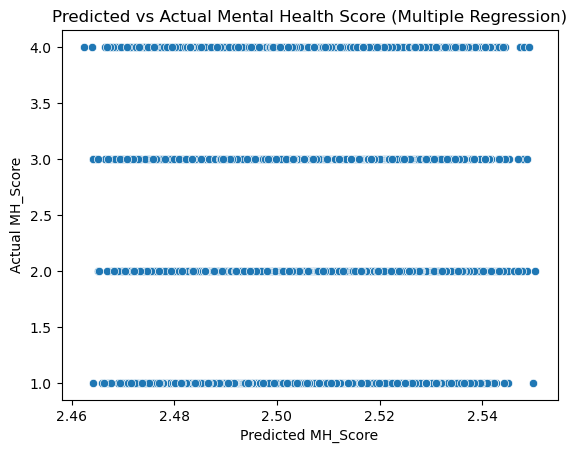

In [49]:
sns.scatterplot(x=y_pred, y=y)
plt.xlabel("Predicted MH_Score")
plt.ylabel("Actual MH_Score")
plt.title("Predicted vs Actual Mental Health Score (Multiple Regression)")
plt.show()


Residual Plot

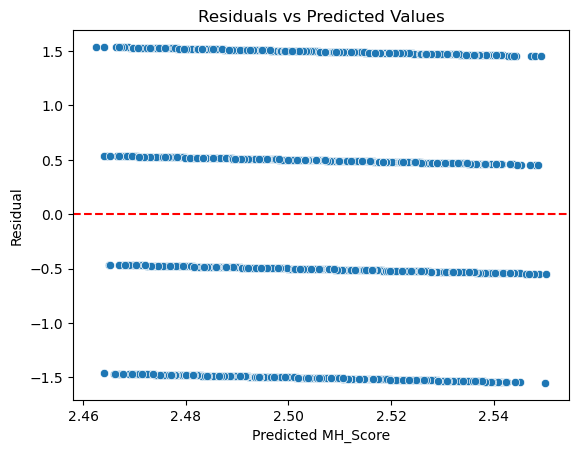

In [50]:
residuals = y - y_pred

sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color="red", linestyle="--")
plt.xlabel("Predicted MH_Score")
plt.ylabel("Residual")
plt.title("Residuals vs Predicted Values")
plt.show()